<hr style="border:2px solid gray"> </hr>
<center>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />
</center>
    
<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 7 - Classification Using Convolutional Neural Networks</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**The objective of this assignment is to familiarize you with building and training Convolutional Neural Networks (CNNs) using TensorFlow/Keras on real-world image datasets. You will implement a CNN model to perform image classification on the CIFAR-10 dataset.**



**Guidelines**
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 7 - Classification Using Convolutional Neural Networks (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

In this part you are asked to implement a CNN model to perform image classification on the CIFAR-10 dataset. 

**Dataset Description:**
- `CIFAR-10` is a benchmark dataset consisting of $60,000$ $32x32$ color images in $10$ classes.
- Each class contains $6,000$ images.
- The dataset is split into $50,000$ training images and $10,000$ test images.

# Question 1: Classification Using CNN 
<hr style="border:1px solid orange"> </hr>

#### Q 1.1: In the following cell, complete the code to read and preprocess the images by scaling pixel values to the range [0, 1]

In [20]:
#pip list

In [21]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical, plot_model
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [22]:
# Loading and preprocessing the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [23]:
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [24]:
# Reshaping the data to fit the model
train_images = train_images.reshape((train_images.shape[0], 32, 32, 3)).astype('float32')
test_images = test_images.reshape((test_images.shape[0], 32, 32, 3)).astype('float32')

In [25]:
# Step 3: Scale pixel value to the range [0, 1]
# Normalize the pixel values to be between 0 and 1
train_images /= 255
test_images /= 255

In [26]:
from keras.utils import to_categorical, plot_model
# One-hot encode the target variables
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#### Q 1.2: Build a CNN Model:
   - Design a CNN architecture using TensorFlow/Keras.
   - Experiment with different architectures (e.g., number of layers, filter sizes, pooling layers) to improve performance.
   - Compile the model with an appropriate optimizer, loss function, and evaluation metric.

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [28]:
# Step 3: Define the CNN architecture
model = Sequential()

# Add a convolutional layer with 32 filters, each with a 3x3 kernel
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Add a max pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output from the convolutional layer
model.add(Flatten())

# Add a fully connected layer with 128 neurons
model.add(Dense(512, activation='relu'))

# Add an output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

In [29]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Q 1.3: Train the Model:
   - Train the CNN model on the training data for a specified number of epochs.
   - Monitor the training process and evaluate the model's performance on the validation set.

In [30]:
#Training the CNN the model using 5 epochs
training_model = model.fit(train_images, train_labels, epochs=10, batch_size=256, validation_data=(test_images, test_labels))

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 92s 457ms/step - accuracy: 0.3143 - loss: 2.1796 - val_accuracy: 0.5512 - val_loss: 1.2918
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 87s 443ms/step - accuracy: 0.5693 - loss: 1.2354 - val_accuracy: 0.5799 - val_loss: 1.1828
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 416ms/step - accuracy: 0.6244 - loss: 1.0740 - val_accuracy: 0.6171 - val_loss: 1.1032
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 423ms/step - accuracy: 0.6602 - loss: 0.9701 - val_accuracy: 0.6341 - val_loss: 1.0466
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 414ms/step - accuracy: 0.7030 - loss: 0.8574 - val_accuracy: 0.6489 - val_loss: 1.0052
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 422ms/step - accuracy: 0.7360 - loss: 0.7650 - val_accuracy: 0.6347 - val_loss: 1.0664
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 96s 489ms/step - accuracy: 0.7663 - loss: 0.6874 - val_accuracy: 0.6664 - val_loss: 0.9935
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 98s 498ms/step - accuracy: 0.8006 - loss: 0

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      14,746,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,264,480 (168.86 MB)

 Trainable params: 14,754,826 (56.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,509,654 (112.57 MB)

In [13]:
# pip install pydot

In [14]:
## pip install --upgrade pydot

Note: you may need to restart the kernel to use updated packages.


In [32]:
plot_model(model)

AttributeError: module 'pydot' has no attribute 'InvocationException'

#### Q 1.4: Evaluate the Model:
   - Evaluate the trained model on the test data to assess its performance.
   - Compute and report the classification accuracy of the model on the test set.
   - Discuss the model performance 

In [33]:
# Evaluating the model performance
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test Accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6691 - loss: 1.0199
Test Accuracy: 0.6678000092506409


In [34]:
predictions = model.predict(test_images[:20])
print('Predictions:', np.argmax(predictions, axis=1))
print('True Labels:', np.argmax(test_labels[:20], axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predictions: [3 8 0 0 4 6 1 6 3 1 0 9 5 7 9 8 5 3 8 6]
True Labels: [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]


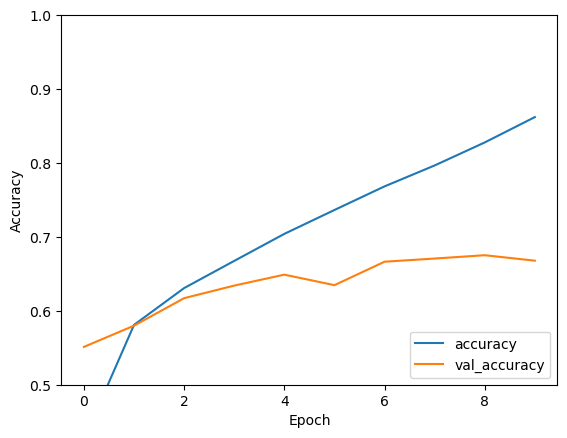

In [36]:
# Step 7: Plot training history (optional)
plt.plot(training_model.history['accuracy'], label='accuracy')
plt.plot(training_model.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

<div class="alert alert-block alert-info">

# Part 2: Reflection 

</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

In [ ]:
??? 

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab7.ipynb** to the **Lab 7 - Classification Using Convolutional Neural Networks (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                 | Excellent                                               | Good                                                  | Average                                                | Below Average                                          | Poor                                                  | No Attempt                                            |
| ----------------------------------------- | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ | ------------------------------------------------------- | ------------------------------------------------------ | ------------------------------------------------------ |
| **Part 1:** Activity-Question 1.1          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.2          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.3          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 1:** Activity-Question 1.4          | **10 points**- Completes all aspects of the question correctly | **8 points**- Completes most aspects of the question correctly | **6 points**- Completes aspects of the question correctly, and some incorrectly | **4 points**- Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points**- Minimal effort or completes a few aspects of the question or very few correctly | **0 points**- Did not complete the question              |
| **Part 2:** Reflection                    | **10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points**- Reflection mostly ties to the module content; experience & importance are discussed | **6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance | **0 points**- Did not complete the reflection             |
